In [1]:
import numpy as np 

## Questão de Manipulação, Operações Matriciais e Multiplicação Escalar

Para montar matrizes que possam realizar operações entre si, é necessário que elas tenham dimensões compatíveis e estejam organizadas corretamente.

#### Regras de Operações Matriciais
- **Soma**: As matrizes devem ter o mesmo número de linhas e colunas.
- **Multiplicação**: O número de colunas da primeira matriz deve ser igual ao número de linhas da segunda matriz.

#### Combinação de Dados com Pesos

Combinar dados com pesos normalmente envolve multiplicar os dados por seus respectivos pesos para calcular um valor ponderado ou uma média ponderada. Essa combinação pode ser realizada de duas formas:

1. **Combinação Linear**
   
   Dado um vetor de dados `x` e um vetor de pesos `w`, a combinação linear seria:
   
   `y = w1 * x1 + w2 * x2 + ... + wn * xn = Σ(wi * xi)`

In [2]:
dados = np.array([3, 5, 2])
pesos = np.array([0.2, 0.3, 0.5])

# Combinação linear
resultado = np.dot(pesos, dados)

print(f'Resultado da combinação: {resultado}')

Resultado da combinação: 3.1


2. **Média Ponderada**
   
   A média ponderada é dada por:
   
   `Média Ponderada = Σ(wi * xi) / Σ(wi)`

In [3]:
media_ponderada = np.dot(pesos, dados) / np.sum(pesos)
print(f'Média ponderada: {media_ponderada}')

Média ponderada: 3.1


#### Observação
Os **pesos** são números que representam quanta influência cada feature tem no resultado final, como, por exemplo, no cálculo do preço de uma casa.

---

## Questão de Cluster: Dado um Cluster, Ele Tem Algum Problema?

Um cluster é um grupo ou conjunto de dados que são semelhantes entre si, mas distintos de dados em outros grupos. O objetivo da análise de cluster é segmentar um conjunto de dados em grupos (clusters) baseados em características comuns, permitindo que se identifiquem padrões ou estruturas nos dados.

### K-means

O K-means é um importante algoritmo de clusterização que divide os dados em um número fixo de clusters (K). O algoritmo funciona iterativamente, minimizando a distância entre os pontos de dados e os centros dos clusters.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles

# número de pontos
n_samples = 50000

# centroides - centro de um cluster 
centers = [(-5, -5), (0, 0), (5, 5)]

# gerando os pontos com base nos centroides
X, y = make_blobs(
    n_samples=n_samples,
    # localizacao dos centroides
    centers=centers,
    shuffle=True,
    random_state=42,
)

# chamando o KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [10]:
# coordenadas dos centroides encontrados pelo KMeans
np.around(kmeans.cluster_centers_, 2)

array([[-2.61, -2.62],
       [ 4.8 ,  4.79]])

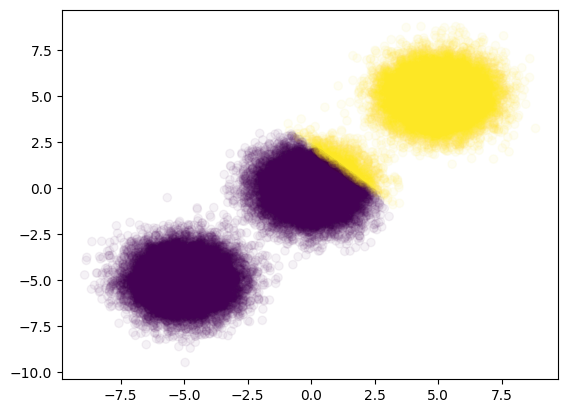

In [12]:
# plotando os pontos e colorindo de acordo com o cluster
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.05)

### Características de um Bom Cluster (Silhouette)

Um bom cluster deve reunir dados de forma coesa, significando que os pontos dentro dele são muito semelhantes, enquanto também se distanciam significativamente de outros clusters. A utilização de métricas como **Silhouette** quantifica essas características, permitindo realizar uma avaliação da qualidade de clusterização. O **Silhouette Score** mede a coesão e separação de cada ponto de dados. 

- O valor varia de -1 a 1:
  - **Próximo a 1**: Os dados estão bem agrupados e distantes de outros clusters.
  - **Próximo a 0**: Os dados estão em fronteiras entre dois clusters.
  - **Negativos**: Indicam que os pontos podem estar mal agrupados.

In [14]:
from sklearn.metrics import silhouette_score

# calculando o silhouette score
silhouette_score(X, kmeans.labels_)

np.float64(0.6136231784443874)

### Identificando Problemas em um Cluster

Para identificar um problema em um cluster, pode-se realizar os seguintes passos:

1. **Visualizar os Dados**:
   - Gráficos de dispersão: Se os dados estiverem muito distantes, isso pode indicar que o agrupamento não está bom.
  
2. **Calcular o Silhouette Score**:
   - Scores abaixo de 0 podem indicar que o cluster não está bom.

3. **Análise de Dados de Entrada**:
   - **Outliers**: Podem distorcer os resultados da clusterização.

4. **Analisar Discrepâncias nas Grandezas**:
   - Quando as grandezas variam muito, algumas podem dominar a análise de cluster.

5. **Verificar o Número de Clusters**:
   - Se o número for muito baixo, informações importantes podem ser perdidas. Se for muito alto, dados que pertencem ao mesmo grupo podem acabar sendo divididos.

   **Exemplo**: Se você tem dados que realmente podem ser agrupados em 4 clusters, mas usa apenas 3, isso pode resultar em:
   - **Clusters Sobrepostos**: Dados que pertencem a clusters diferentes podem ser agrupados em um único cluster, levando a uma análise imprecisa.
   - **Clusters Vazios**: Um cluster pode não ter pontos suficientes, indicando que o número de clusters foi mal definido.

### Correção de Problemas

Para corrigir alguns problemas, considere as seguintes abordagens:

- **Definir o Número Certo de Clusters**:
  - Use o Silhouette Score e teste diferentes valores de K.

- **Normalizar os Dados**:
  - Se as grandezas estiverem muito discrepantes, normalizar os dados pode ajudar a melhorar a análise.

Após corrigir o cluster, para verificar se houve melhoria, basta calcular o Silhouette Score novamente.

In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supondo que X é seu conjunto de dados original
df = pd.DataFrame(X, columns=['x', 'y'])

# Calcular o Coeficiente de Variação (CV) para cada coluna
cv = df.std() / df.mean()
print("Coeficiente de Variação original:")
print(cv)

# Normalizar os dados
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

# Criar um DataFrame a partir dos dados normalizados para facilitar a análise
df_normalized = pd.DataFrame(df_normalized, columns=['x', 'y'])

# Calcular o CV após normalização
cv_normalized = df_normalized.std() / df_normalized.mean()
print("\nCoeficiente de Variação após normalização:")
print(cv_normalized)

Coeficiente de Variação original:
x    1059.440655
y   -1880.831308
dtype: float64

Coeficiente de Variação após normalização:
x    0.470956
y    0.444069
dtype: float64


#### Observação 
Os **outliers**, ou valores atípicos, são dados que se afastam significativamente do padrão geral de um conjunto de dados. Eles podem ser muito maiores ou muito menores do que a maioria dos outros dados, e, muitas vezes, são considerados ruído ou erros de medição.

---

## Questão de SVD: Dado um dataset onde as colunas de U são os médicos, linhas de V remédios, aplique a distância cosseno para identificar os outliers. 

O svd (Singular Value Decomposition) é uma técnica de decomposição de matrizes que fatora uma matriz A em três matrizes: 
- **U**: Matriz dos vetores singulares à esquerda.
- **Sigma**: Matriz diagonal contendo os valores singulares.
- **VT**: Matriz dos vetores singulares à direita (transposta).

#### Exemplo

Ele é usado para reduzir a dimensionalidade de conjunto de dados, permitindo representar dados complexos em um espaço de menor dimensão. Um exemplo é: Se você tiver uma matriz A que representa as notas de alunos em diferentes disciplinas, ao aplicar SVD, você poderá identificar quais disciplinas são mais influentes nas notas gerais e reduzir a complexidade da matriz, facilitando a análise.

### Distância Cosseno

A **distância cosseno** é uma medida que quantifica a similaridade entre dois vetores em um espaço vetorial, baseada no ângulo entre eles. Ela pode ser utilizado para identificar outliers, verificando essa distância de cada produto em relação aos outros produtos. Como interpretar:

### Interpretação da Distância Cosseno

- **Valores próximos a 1**: Indicam que os vetores estão em direções semelhantes, sinalizando alta similaridade.
- **Valores próximos a 0**: Indicam que os vetores são ortogonais, ou seja, não possuem similaridade.
- **Valores próximos a -1**: Indicam que os vetores estão em direções opostas, sugerindo baixa similaridade.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Gerando uma matriz aleatória
np.random.seed(0)
A = np.random.rand(10, 5)  # 10 amostras e 5 características

# Aplicando SVD
U, S, VT = np.linalg.svd(A)

# Reduzindo para 2 dimensões usando os primeiros 2 componentes
X_reduced = U[:, :2]

# Função para calcular a distância do cosseno
def cosine_distance(a, b):
    return 1 - np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Calculando a distância do cosseno entre cada par de pontos
distances = np.zeros((X_reduced.shape[0], X_reduced.shape[0]))

for i in range(X_reduced.shape[0]):
    for j in range(X_reduced.shape[0]):
        distances[i, j] = cosine_distance(X_reduced[i], X_reduced[j])

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=100, c='blue', label='Pontos Reduzidos')
for i in range(X_reduced.shape[0]):
    plt.annotate(f'{i}', (X_reduced[i, 0], X_reduced[i, 1]), fontsize=12, ha='right')

plt.title('Distribuição SVD com Distância do Cosseno')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

# Exibindo as distâncias do cosseno
print("Matriz de Distâncias do Cosseno:")
print(distances)

## Questões de Regressão Linear: 

A **regressão linear** é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (target) e uma ou mais variáveis independentes (features). O objetivo da regressão linear é encontrar a melhor linha reta que se ajusta aos dados, permitindo prever valores do target com base nas features.

### Tipos de Regressão
- **Regressão Linear Simples**: Envolve uma única variável independente. Por exemplo, prever o preço de um imóvel com base apenas em sua área.
  
- **Regressão Linear Múltipla**: Envolve duas ou mais variáveis independentes. Por exemplo, prever o preço de um imóvel com base em sua área, número de quartos e localização.

### Dado um modelo de regressão linear, identificar os pesos.

In [12]:
import numpy as np

def make_test_data(n):
    x = np.random.uniform(0.0, 2.0, [n, 1])
    noise = np.random.normal(0.0, 1.0, [n, 1])
    y = 4.0 + 3.0 * x + noise
    return x, y

In [16]:
from sklearn.linear_model import LinearRegression

n = 1000

def linear_regression(x, y):
    model = LinearRegression()
    model.fit(x, y)
    return model.intercept_[0], model.coef_[0][0]

theta_0_list = []
theta_1_list = []

for _ in range(1000):
    x, y = make_test_data(n)
    intercept, slope = linear_regression(x, y)
    theta_0_list.append(intercept)
    theta_1_list.append(slope)

print("Pesos", theta_0_list[:10])

Pesos [np.float64(3.994713554776202), np.float64(3.908612809848826), np.float64(4.011484258268981), np.float64(4.0510815369967155), np.float64(4.032524691582436), np.float64(3.959383234862187), np.float64(4.086281549063513), np.float64(3.965015239267735), np.float64(3.9534680418172177), np.float64(3.958460934517002)]


Ou

In [17]:
from sklearn.linear_model import LinearRegression

n = 1000

theta_0_list = []
theta_1_list = []

for _ in range(1000):
    x, y = make_test_data(n)
    model = LinearRegression()
    model.fit(x, y)
    intercept, slope = model.intercept_[0], model.coef_[0][0]
    theta_0_list.append(intercept)
    theta_1_list.append(slope)

print("Pesos", theta_0_list[:10])

Pesos [np.float64(3.828223932165041), np.float64(4.011658093696052), np.float64(3.9172719990509974), np.float64(4.0143358162694), np.float64(4.054963739380574), np.float64(3.8935481409295543), np.float64(3.9443566876811977), np.float64(3.9530934806153835), np.float64(3.945217992567184), np.float64(4.021020781832952)]


### Estatística dos pesos
- **Intercepto (Intercept)**: Este é o valor previsto do target quando todas as variáveis independentes x são 0.

- **Coeficiente (Slope)**: Este é o peso que indica a relação entre a variável independente x e a variável dependente y, ou seja, para cada unidade de aumento em x, o quanto y aumenta ou diminui

### Dado um gráfico, monte uma regressão linear

Intercepto: [1.]
Coeficiente: [[2.]]


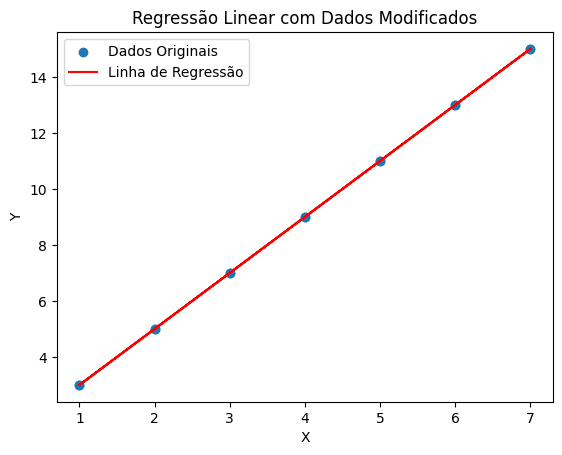

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Passo 1: Modificar os dados de acordo com o padrão
X = np.array([[1, 2, 3, 4, 5, 6, 7],
              [1, 2, 3, 4, 5, 6, 7]])
Y = np.array([[2 * x + 1 for x in X[0]],
              [2 * x + 1 for x in X[1]]])

# Passo 2: Converter para formato adequado para o modelo (vetorização dos dados)
X_reshaped = X.reshape(-1, 1)  # Transformar em vetor coluna
Y_reshaped = Y.reshape(-1, 1)

# Passo 3: Criar o modelo de regressão linear
model = LinearRegression()

# Passo 4: Treinar o modelo com os dados modificados
model.fit(X_reshaped, Y_reshaped)

# Exibir os coeficientes da regressão
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")

# Passo 5: Prever os valores de Y com o modelo treinado
Y_pred = model.predict(X_reshaped)

# Visualizar os dados e a linha de regressão
plt.scatter(X_reshaped, Y_reshaped, label="Dados Originais")  # Dados originais
plt.plot(X_reshaped, Y_pred, color='red', label="Linha de Regressão")  # Linha de regressão
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regressão Linear com Dados Modificados")
plt.legend()
plt.show()

## Questão de feature engineering: Dado um dataset, como você monta um feature engineering?

É o processo de utilizar conhecimento do domínio para selecionar, modificar ou criar features que ajudem a melhorar o desempenho de um modelo preditivo em machine learning. O objetivo é transformar dados brutos em um formato que seja mais adequado para algoritmos de aprendizado de máquina.



array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

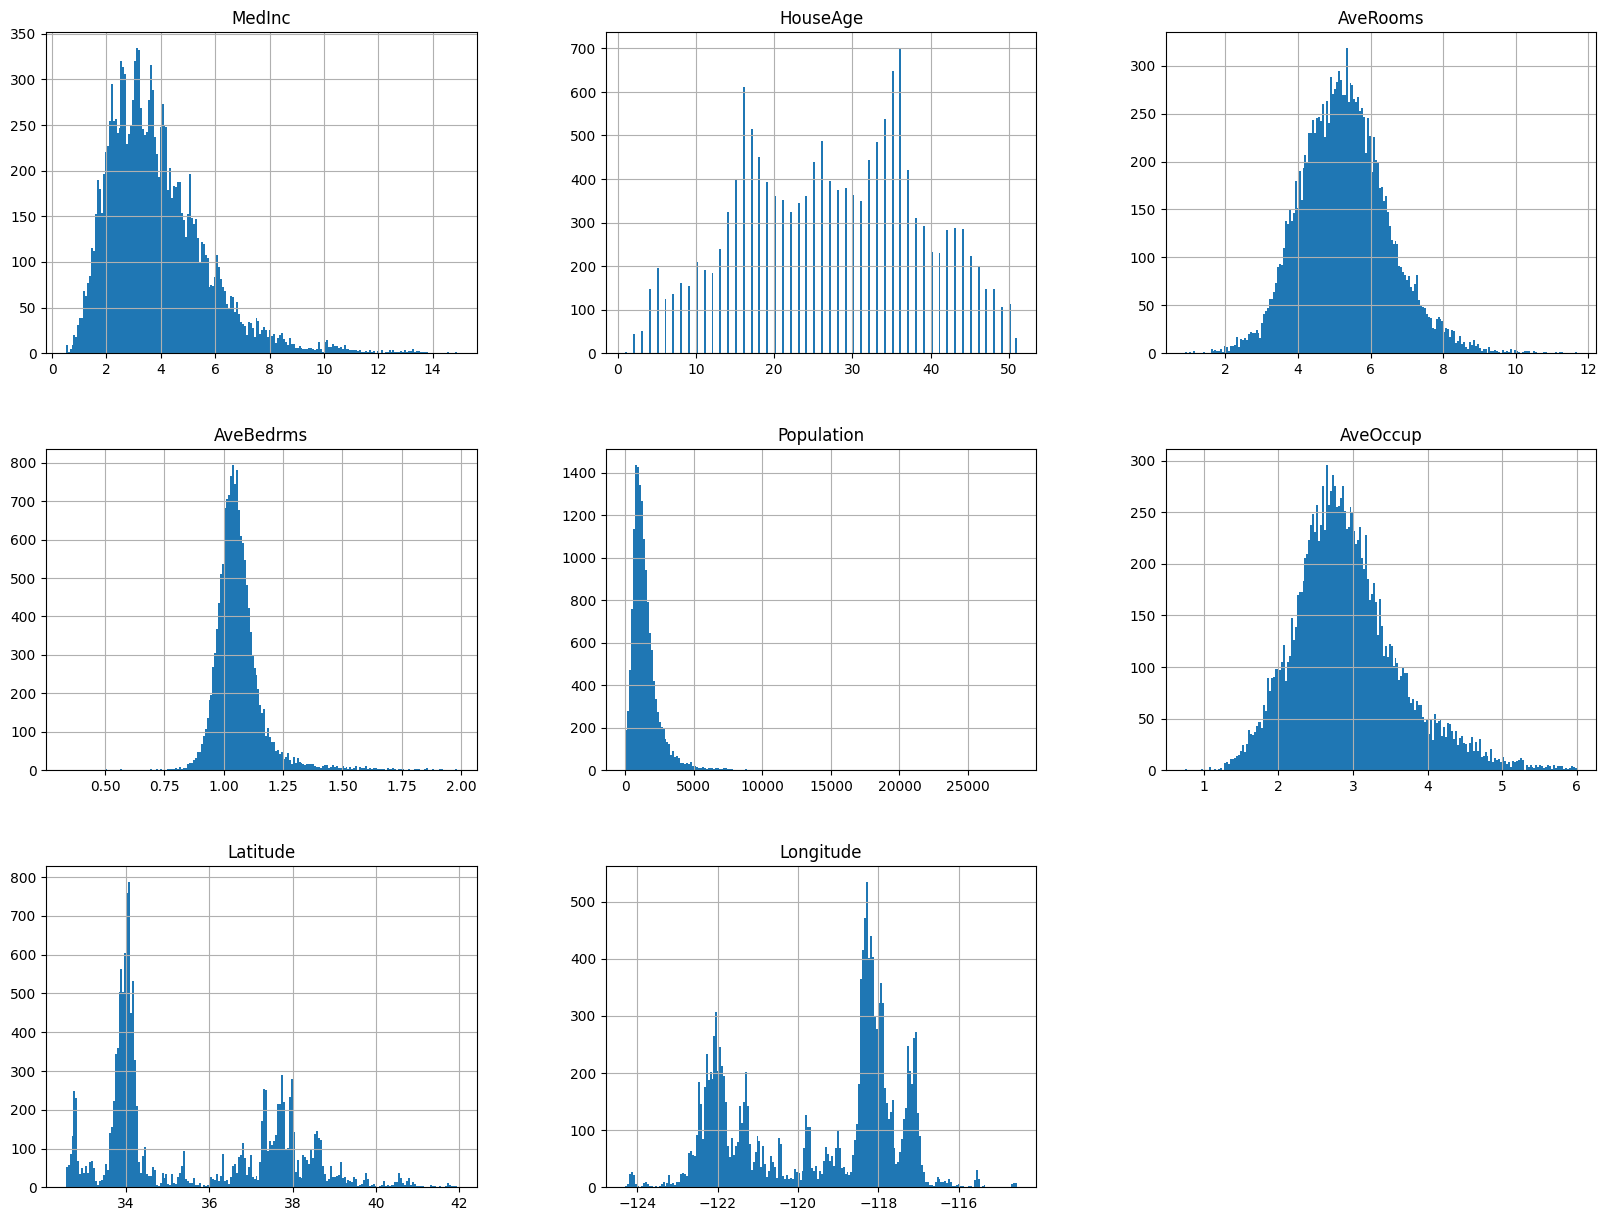

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

california = fetch_california_housing()

X = california['data']
y = california['target']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

df_train = pd.DataFrame(X_train, columns=california['feature_names'])

def filtra_dados(X, y, columns):
    df = pd.DataFrame(X, columns=columns)
    df['target'] = y
    df = df[
        (df['AveOccup'] < 6) &
        (df['AveRooms'] < 12) &
        (df['AveBedrms'] < 2) &
        (df['MedInc'] < 15) &
        (df['HouseAge'] < 52)   
    ]
    X_filt = df[columns].values
    y_filt = df['target'].values
    return X_filt, y_filt

X_train_filt, y_train_filt = filtra_dados(X_train, y_train, california['feature_names'])
X_test_filt, y_test_filt = filtra_dados(X_test, y_test, california['feature_names'])

df = pd.DataFrame(X_train_filt, columns=california['feature_names'])
df.hist(bins=200, figsize=(20, 15))

<Axes: >

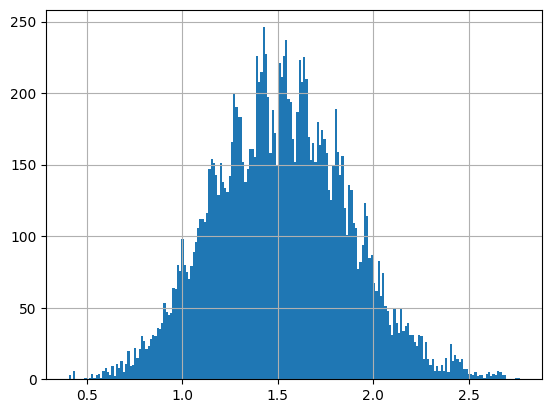

In [5]:
df['MedInc'].apply(np.log1p).hist(bins=200)

## Exercícios

#### Observação
Vetores **linearmente dependentes** são vetores múltiplos um do outro, ou seja, um vetor pode ser escrito como uma combinação linear dos outros vetores. Vetores **linearmente independentes** são vetores que não podem ser escritos como combinação linear dos outros vetores.

### Questão bananas e maças

Bananas têm 420 mg de potássio, 27 g de carboidratos e 1,3 g de proteína. Maçãs têm 200 mg de potássio, 25 g de carboidratos e 0,5 g de proteína.

a) Pode-se dizer que bananas e maçãs são equivalentes? (Ou seja, o conjunto $\{\underset{\text{banana}}{\vec{V}}, \underset{\text{maçã}}{\vec{V}}\}$ é L.D. ou L.I.)


In [6]:
# Resolução a)

banana = np.array([420, 27, 1.3])
maca = np.array([200, 25, 0.5])

p1 = banana[0]/maca[0]
p2 = banana[1]/maca[1]
p3 = banana[2]/maca[2]

print(p1, p2, p3)
# Como não existe um valor constante, são linearmente independentes.

2.1 1.08 2.6


b) Uma baçã é uma fruta fictícia com 310 mg de potássio, 26 g de carboidratos e 0,9 g de proteína. A baçã traz mais variedade nutricional? (Ou seja, o conjunto $\{\underset{\text{banana}}{\vec{V}}, \underset{\text{maçã}}{\vec{V}}, \underset{\text{baçã}}{\vec{V}}\}$ é L.D. ou L.I.)

In [7]:
# Resolução b)

baca = np.array([310, 26, 0.9])

# Matriz com os vetores (ordem não importa)
matriz = np.array([banana, maca, baca])

# Determinante pois com 3 vetores, que formam uma matriz 3x3 (possível de calcular determinante), podemos verificar se são linearmente dependentes ou independentes.
determinante = np.linalg.det(matriz) # para calcular o determinante é necessário possuir uma matriz quadrada

print(f'Determinante: {determinante}')

if determinante == 0:
    print('São linearmente dependentes')
else:
    print('São linearmente independentes')

Determinante: 0.0
São linearmente dependentes


### Questão minions

- Bananas have $420$ mg of potassium, $27$ g of carbohydrates, and $1.3$ g of protein. 
- Apples have $200$ mg of potassium, $25$ g of carbs and $0.5$ g of protein.

Kevin likes to eat $5$ bananas and $3$ apples a day, while Stuart likes to eat $2$ bananas and $4$ apples a day. 

(a) You already wrote the nutritional information of the fruits as a matrix of nutrients (rows) per fruits (columns). Now write the eating preferences (quantity of fruit per day) of Kevin and Stuart as a matrix of fruits (rows) per character (columns)

(b) You now have two matrices: $\boldsymbol{F}{\text{nutrients} \times \text{fruits}}$ and $\boldsymbol{P}{\text{fruits} \times \text{characters}}$. Write the matrix product that allows us to obtain the amount of nutrients per character.

#### Resposta a)

$Fnf = \begin{bmatrix} 420 & 27 & 1.3 \\ 200 & 25 & 0.5 \end{bmatrix}$

$Fnf.T = \begin{bmatrix} 420 & 200 \\ 27 & 25 \\ 1.3 & 0.5 \end{bmatrix}$

$Pfc = \begin{bmatrix} 5 & 2 \\ 3 & 4 \end{bmatrix}$

In [8]:
# Resposta b)

import numpy as np

fnf = np.array([[420, 27, 1.3], [200, 25, 0.5]]).T
pfc = np.array([[5, 2], [3, 4]])

resultado = np.dot(fnf, pfc)
print(resultado)

[[2700.  1640. ]
 [ 210.   154. ]
 [   8.     4.6]]


$Mnutrients = \begin{bmatrix} 2700 & 1640 \\ 210 & 154 \\ 8 & 4.6 \end{bmatrix}$